In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from kneed import KneeLocator
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score


In [2]:
# Collecting data
df = pd.read_csv('heart-disease-dataset.csv')
df.replace('?', np.nan, inplace=True)

In [3]:
X = df[['age', 'chol']].dropna()

# Scaling the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculating the KMeans Value
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
X['cluster'] = kmeans.fit_predict(X_scaled)

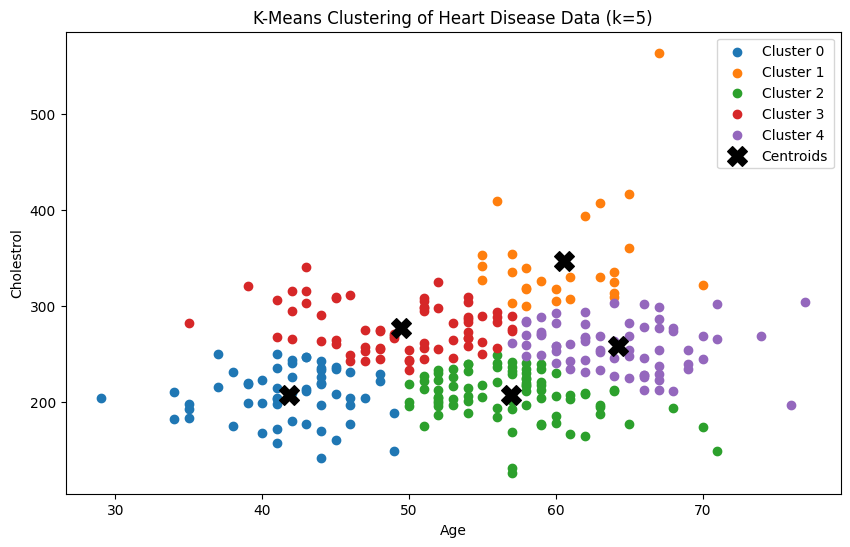

In [4]:
# Ploting of data for each clusture section
plt.figure(figsize=(10, 6))
for cluster in range(5):
    clustered_data = X[X['cluster'] == cluster]
    plt.scatter(clustered_data['age'], clustered_data['chol'], label=f'Cluster {cluster}')

# Ploting cluster centers
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='X', s=200, label='Centroids')

# Ploting the chart
plt.xlabel("Age")
plt.ylabel("Cholestrol")
plt.title("K-Means Clustering of Heart Disease Data (k=5)")
plt.legend()
plt.show()

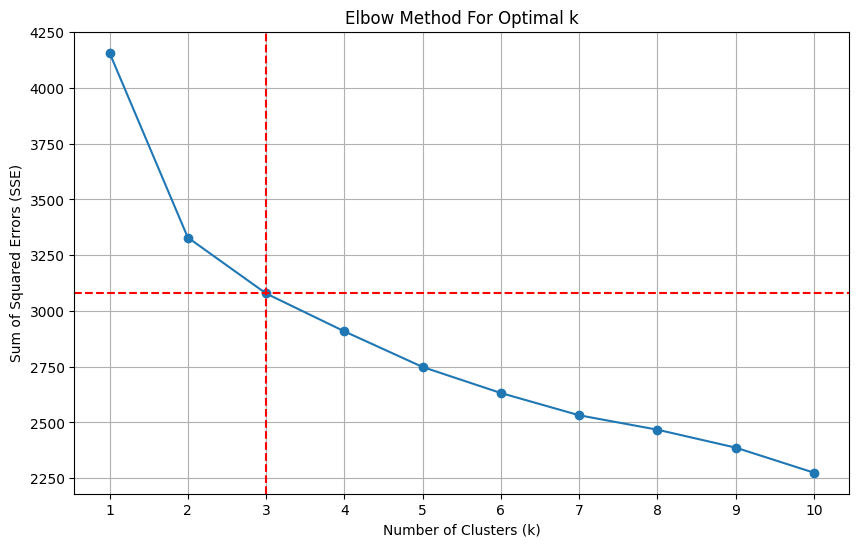

In [5]:

X = df.dropna()
X_scaled = scaler.fit_transform(X)

def calculate_kmeans_sse(k: int):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    return kmeans.inertia_

K_values = [i for i in range(1, 11, 1)]
SSE_Values = [calculate_kmeans_sse(i) for i in range(1, 11, 1)]

# Using KneeLocator to find the best k (elbow point)
knee = KneeLocator(K_values, SSE_Values, curve="convex", direction="decreasing")
optimal_k = knee.elbow

# Plotting the SSE values for different k values [1, 10] and also the elbow point
plt.figure(figsize=(10, 6))
plt.plot(K_values, SSE_Values, marker='o')
plt.axvline(x=optimal_k, color='red', linestyle='--')
plt.axhline(y=SSE_Values[optimal_k-1], color='red', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method For Optimal k')
plt.xticks(K_values)
plt.grid(True)
plt.show()




/var/folders/v1/jdh6fxf142q38l__7b53ncq00000gn/T/ipykernel_78943/3732364077.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = kmeans.fit_predict(X_scaled)


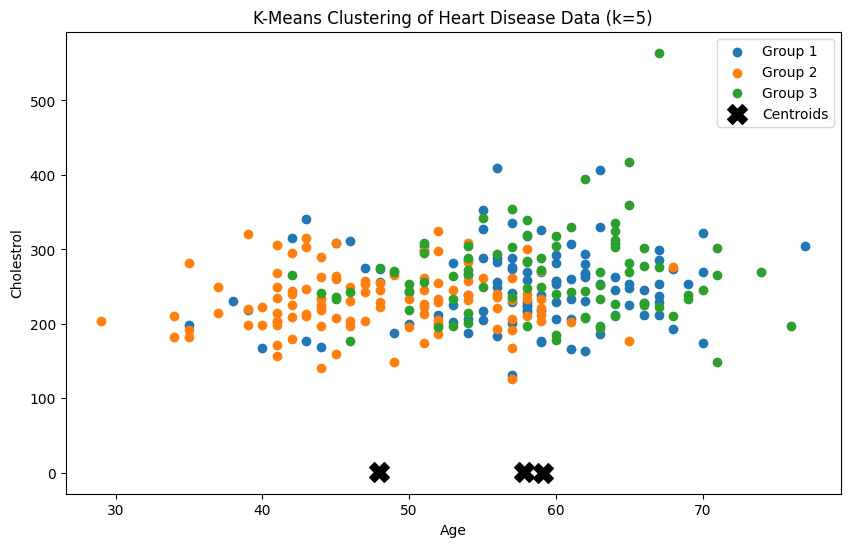

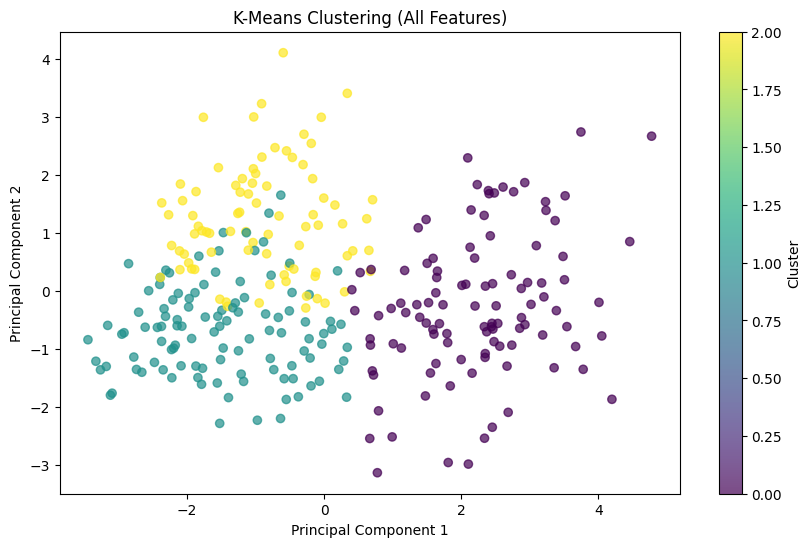

In [6]:
k = 3
X = df.dropna()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
X['cluster'] = kmeans.fit_predict(X_scaled)

# --- Visualization 1: Age vs. Cholesterol Scatter Plot ---
plt.figure(figsize=(10, 6))
for cluster in range(k):
    clustered_data = X[X['cluster'] == cluster]
    plt.scatter(clustered_data['age'], clustered_data['chol'], label=f'Group {cluster + 1}')
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='X', s=200, label='Centroids')
plt.xlabel("Age")
plt.ylabel("Cholestrol")
plt.title("K-Means Clustering of Heart Disease Data (k=5)")
plt.legend()
plt.show()

# --- Visualization 2: PCA-based 2D Plot ---
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X['cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(label="Cluster")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering (All Features)")
plt.show()


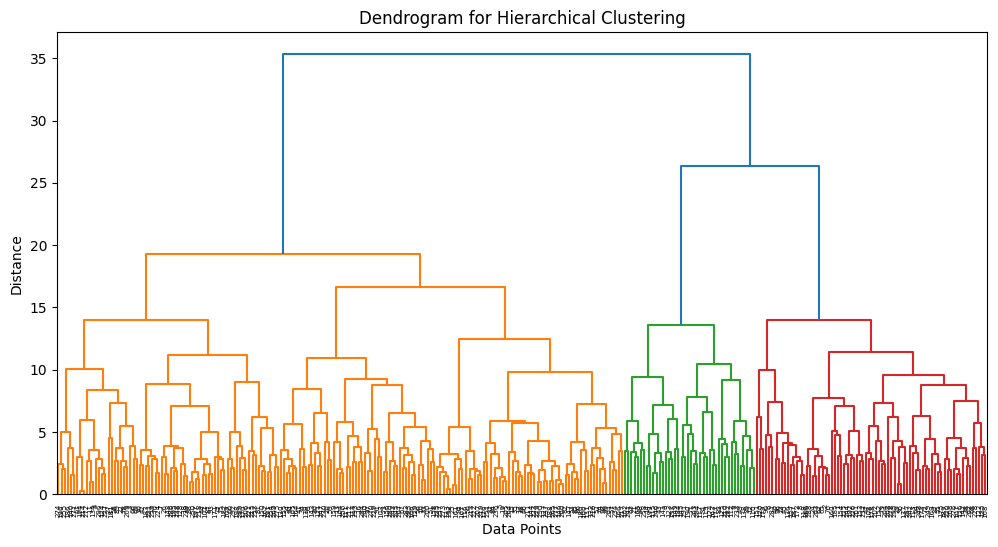

In [7]:
# Compute the linkage matrix for hierarchical clustering
linkage_matrix = sch.linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
sch.dendrogram(linkage_matrix)
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.title("Dendrogram for Hierarchical Clustering")
plt.show()

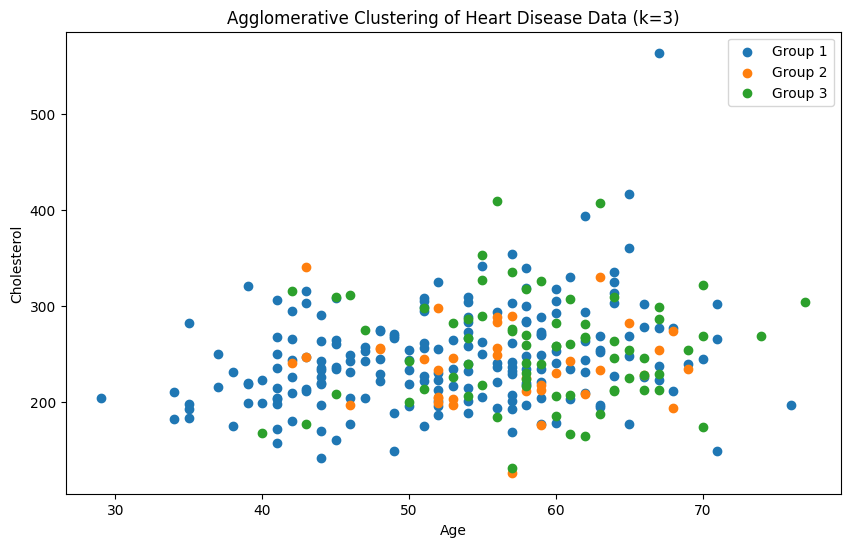

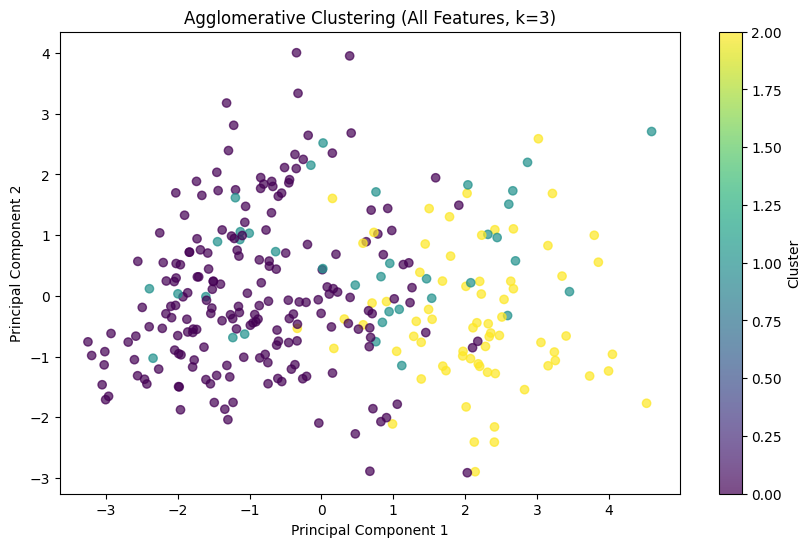

In [8]:
# Select only numerical columns
X = df.select_dtypes(include=[np.number])

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

optimal_k = 3 

# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=optimal_k)
X['cluster'] = agglo.fit_predict(X_scaled)

# --- Visualization 1: Age vs. Cholesterol Scatter Plot ---
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    clustered_data = X[X['cluster'] == cluster]
    plt.scatter(clustered_data['age'], clustered_data['chol'], label=f'Group {cluster + 1}')
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.title(f"Agglomerative Clustering of Heart Disease Data (k={optimal_k})")
plt.legend()
plt.show()

# --- Visualization 2: PCA-based 2D Plot ---
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X['cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(label="Cluster")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title(f"Agglomerative Clustering (All Features, k={optimal_k})")
plt.show()

In [9]:
# Set optimal k from previous question
optimal_k = 3

# --- K-Means Clustering ---
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette:.4f}")

# --- Agglomerative Clustering ---
agglo = AgglomerativeClustering(n_clusters=optimal_k)
agglo_labels = agglo.fit_predict(X_scaled)
agglo_silhouette = silhouette_score(X_scaled, agglo_labels)
print(f"Agglomerative Clustering Silhouette Score: {agglo_silhouette:.4f}")

# Compare the scores
if kmeans_silhouette > agglo_silhouette:
    print("K-Means clustering performs better based on the silhouette score.")
else:
    print("Agglomerative clustering performs better based on the silhouette score.")

K-Means Silhouette Score: 0.1393
Agglomerative Clustering Silhouette Score: 0.1655
Agglomerative clustering performs better based on the silhouette score.
